In [2]:
import tensorflow as tf
tf.compat.v1.disable_eager_execution()
tf.compat.v1.logging.set_verbosity(tf.compat.v1.logging.ERROR)

sess=tf.compat.v1.Session()

import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
%matplotlib inline

## not게이트 연습(선형)

In [8]:
#1 not게이트
learning_rate = 0.1 ## 학습율을 0.1로주고

x_data = [[0],   [1]]
y_data = [[1],  [0]] ## 학습데이터가 0일때 1, 1일때 0출력

x_data = np.array(x_data, dtype=np.float32)  ## np.객체로 바꾸고
y_data = np.array(y_data, dtype=np.float32)


### 버전문제로 placeholder안되서 준명령어
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()

## 데이터를 담을 placeholder..none(학습데이터의 갯수)*1(학습데이터의 크기)
x = tf.placeholder(tf.float32, [None, 1]) 
y = tf.placeholder(tf.float32, [None, 1])
## random_normal은 0에서 1사이의 정규확률 분포값을 랜덤으로 만들어주는거
w = tf.Variable(tf.random_normal([1, 1]))#1*1인 2차원 (행렬곱을 하려고 2차원으로 만듬)
b = tf.Variable(tf.random_normal([1]))# 1차원

#학습이론 x*w +b
hypothesis = tf.matmul(x, w) + b
#cost함수
cost = tf.reduce_sum(tf.square(hypothesis - y))
#경사하강법을 사용해 계산오차를 최소화
train = tf.train.GradientDescentOptimizer(learning_rate=learning_rate).minimize(cost)

#정확도를 계산하기 위해 hypothesis값을 0,1의 벡터로 만들어주기
#  hypothesis = [[ 0.7  0.2  ] ]  ->     [ 0.7 > 0.5    0.2 >  0.5]   ->  [ true  false]     ->   [  1 0 ]
predicted = tf.cast(hypothesis > 0.5, dtype=tf.float32)

#predict와 실제 y결과값을 비교하기
# [[1 0 ]]   == [[ 1  1] ]   ->   [[ true   false ] ] ->  [] [ 1  0] ] ->   [ 0.5 ]
accuracy = tf.reduce_mean(tf.cast(tf.equal(predicted, y), dtype=tf.float32))

#초기화하고
sess.run(tf.global_variables_initializer())

# 학습 20번실시
for step in range(20):  ### 여기 10을주면 인식률이 낮지만 20을 주면 인식율이 1됨
        sess.run(train, feed_dict={x: x_data, y: y_data})
        a =  sess.run(accuracy, feed_dict={x: x_data, y: y_data})
        print("인식률 ", a)     ### 인식률이 정확도를 의미(인식율1 = 정확도100%)
        
w_, b_ = sess.run([w,b])
print("w=%f, b=%f" % (w_, b_))

인식률  0.5
인식률  1.0
인식률  1.0
인식률  1.0
인식률  1.0
인식률  1.0
인식률  1.0
인식률  1.0
인식률  1.0
인식률  1.0
인식률  1.0
인식률  1.0
인식률  1.0
인식률  1.0
인식률  1.0
인식률  1.0
인식률  1.0
인식률  1.0
인식률  1.0
인식률  1.0
w=-0.851830, b=0.908426


1. 인식율과 평균인식율

In [12]:
## 방금위에서는 학습횟수에 따라 인식율(정확도)가 달라짐
## 같은실험을 반복해서 -> 신뢰성있는 [평균인식율]을 계산하자!
## 인식율은 여러번 실험을해서 평균을 구해야 의미가있음
result = [];
experiment = 30
for n in range (experiment) :
    sess.run(tf.global_variables_initializer())  ## 반복할때마다 초기화해줘야함
    for step in range(20):
            sess.run([train, cost], feed_dict={x: x_data, y: y_data})
            a =  sess.run([accuracy], feed_dict={x: x_data, y: y_data})    
    result.append(a[0])   
print('실험끝')

실험끝


[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]
1.0


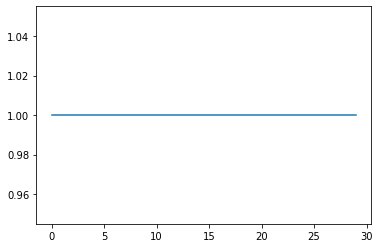

In [13]:
print(result)
print(  sum(result) / experiment)
plt.plot(result)
## 결과를 보면 모든경우에 인식율이 1이됨

2. 학습중지조건 (정확도 조건을 걸어서 그걸 만족하면 자동으로 정지하도록)

평균 6     최소 1    최대 18


(array([7., 3., 4., 3., 2., 7., 1., 2., 0., 1.]),
 array([ 1. ,  2.7,  4.4,  6.1,  7.8,  9.5, 11.2, 12.9, 14.6, 16.3, 18. ]),
 <BarContainer object of 10 artists>)

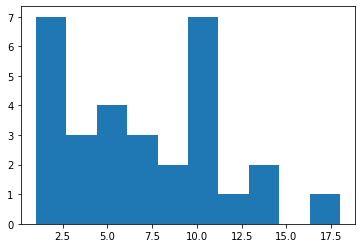

In [15]:
result = [];
for n in range (experiment) :
    sess.run(tf.global_variables_initializer())
    for step in range(100): ## 학습을 100번할것이고
            sess.run(train, feed_dict={x: x_data, y: y_data})
            a =  sess.run([accuracy], feed_dict={x: x_data, y: y_data})
            if a[0] >= 1.0 :  ##a가 >=조건을 만족하면 정지하겠다
                break    
    result.append(step+1)
### 정확도가 1일때, 평균적으로 언제 학습이 끝나는지, 최대/최소 학습횟수를 출력
print( '평균 %d     최소 %d    최대 %d' % ( sum(result) / experiment, min(result),   max(result)))
plt.hist(result)

## OR, NAND 게이트 연습 (조건이 2개, 선형)

In [17]:
learning_rate = 0.1
## 이때 x는 4*2 y는 4*1 모양임
x_data = [[0, 0],       [0, 1],        [1, 0],        [1, 1]]
y_data = [[0],  [1],      [1],   [1]]       # OR 게이트 (둘중에 하나라도 1이면 1출력)
##y_data = [[1],  [1],      [1],   [0]]      # NANND 게이트(둘다가 1이면 0출력)


x_data = np.array(x_data, dtype=np.float32)
y_data = np.array(y_data, dtype=np.float32)


### 버전문제로 placeholder안되서 준명령어
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()

## 데이터를 담을 placeholder..none(학습데이터의 갯수)*1(학습데이터의 크기)
x = tf.placeholder(tf.float32, [None, 2]) none*2
y = tf.placeholder(tf.float32, [None, 1])

## random_normal은 0에서 1사이의 정규확률 분포값을 랜덤으로 만들어주는거
w = tf.Variable(tf.random_normal([2, 1]))#2*1인 2차원 (행렬곱을 하려고 2차원으로 만듬)
b = tf.Variable(tf.random_normal([1]))# 1차원


#학습이론 x*w +b
hypothesis = tf.matmul(x, w) + b
#cost함수
cost = tf.reduce_sum(tf.square(hypothesis - y))
#경사하강법을 사용해 계산오차를 최소화
train = tf.train.GradientDescentOptimizer(learning_rate=learning_rate).minimize(cost)

#정확도를 계산하기 위해 hypothesis값을 0,1의 벡터로 만들어주기
#  hypothesis = [[ 0.7  0.2  ] ]  ->     [ 0.7 > 0.5    0.2 >  0.5]   ->  [ true  false]     ->   [  1 0 ]
predicted = tf.cast(hypothesis > 0.5, dtype=tf.float32)

#predict와 실제 y결과값을 비교하기
# [[1 0 ]]   == [[ 1  1] ]   ->   [[ true   false ] ] ->  [] [ 1  0] ] ->   [ 0.5 ]
accuracy = tf.reduce_mean(tf.cast(tf.equal(predicted, y), dtype=tf.float32))

#초기화하고
sess.run(tf.global_variables_initializer())

#학습시킴. 이때 브레이크 조건을 줘서 a>=면 자동으로 멈추기
sess.run(tf.global_variables_initializer())

for step in range(1000):
        sess.run(train, feed_dict={x: x_data, y: y_data})
        p, a =  sess.run([predicted, accuracy], feed_dict={x: x_data, y: y_data})
        print(step +1 , p.reshape(1,4), a)
        if a >= 1.0 :             
            break 

1 [[0. 1. 0. 1.]] 0.75
2 [[0. 1. 0. 1.]] 0.75
3 [[0. 1. 0. 1.]] 0.75
4 [[0. 1. 0. 1.]] 0.75
5 [[0. 1. 0. 1.]] 0.75
6 [[0. 1. 1. 1.]] 1.0


 학습중단조건 분석 (정확도1이 아닌 cost기준으로)

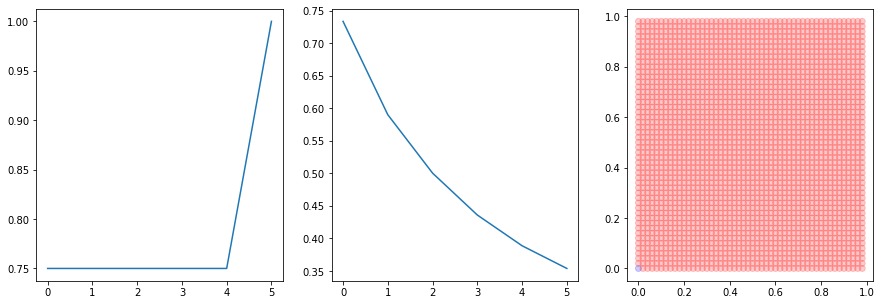

In [28]:
## 정확도가 1일때 학습을 정지하는것에 문제가 있음
sess.run(tf.global_variables_initializer())

result = []
result_cost = []

for step in range(1000):
        sess.run(train, feed_dict={x: x_data, y: y_data})
        a, c =  sess.run([accuracy, cost], feed_dict={x: x_data, y: y_data})
        result.append(a)
        result_cost.append(c)        
        if a >= 1.0 :             
            break 
        
          
plt.figure(1, figsize=(15,5))        

plt.subplot(1,3,1)  ### 정확도의 변화 그래프
plt.plot(result)
plt.subplot(1,3,2)  ### cost의 변화그래프
plt.plot(result_cost)

plt.subplot(1,3,3)  ### decision boundary(결정경계)그래프(학습결과를 시각화해주는거)
xx, yy = np.mgrid[0:1:0.02, 0:1:0.02]
grid = np.c_[xx.flatten(), yy.flatten()]
h = sess.run(hypothesis, feed_dict={x: grid})
colors = ["red"  if i>  0.5  else  "blue"  for i  in h   ]
plt.scatter(xx.flatten(), yy.flatten(), color = colors, alpha=0.2)

정확도가 1인시점에도 cost는 계속해서 하강 하지만 결정경계가 치우쳐있음...  즉 학습중단결정은 cost가 기준이 되어야함

1 0.590824
11 0.26042798
21 0.25062895
31 0.25004202
41 0.25000283


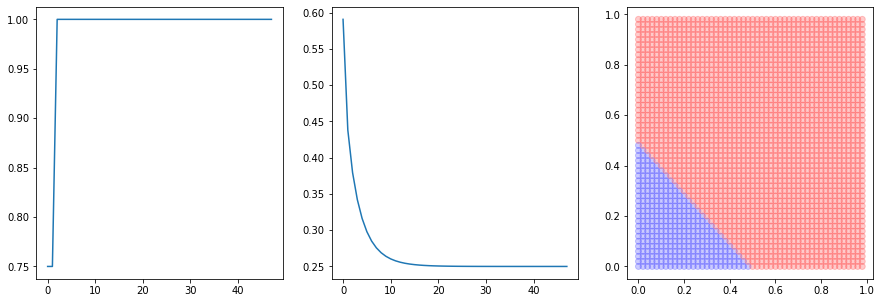

In [29]:
##  ## cost의 변화가 작으면 중단
sess.run(tf.global_variables_initializer())

result = []
result_cost = []

old = 100
for step in range(101):
        sess.run(train, feed_dict={x: x_data, y: y_data})
        a, c =  sess.run([accuracy, cost], feed_dict={x: x_data, y: y_data})
        result_cost.append(c)
        result.append(a)
        if (old - c  <= 0.0000001 ) :      break   ## cost의 변화가 작으면 중단
        if step % 10 == 0 : 
            print( step+ 1, c  )                
        old = c
          

plt.figure(1, figsize=(15,5))        

plt.subplot(1,3,1)
plt.plot(result)
plt.subplot(1,3,2)
plt.plot(result_cost)

plt.subplot(1,3,3)
xx, yy = np.mgrid[0:1:0.02, 0:1:0.02]
grid = np.c_[xx.flatten(), yy.flatten()]
h = sess.run(hypothesis, feed_dict={x: grid})
colors = ["red"  if i>  0.5  else  "blue"  for i  in h   ]
plt.scatter(xx.flatten(), yy.flatten(), color = colors, alpha=0.2)  

정확도가 1인시점에도 cost는 계속해서 하강  결정경계가 치우치지 않았음. cost기준학습종료로 안정성이 보장됨

 바이어스

1 3.4455428
11 2.33849
21 2.3333926
31 2.333334
41 2.3333333
51 2.3333333
61 2.3333333
71 2.3333333
81 2.3333335
91 2.3333335
101 2.3333335


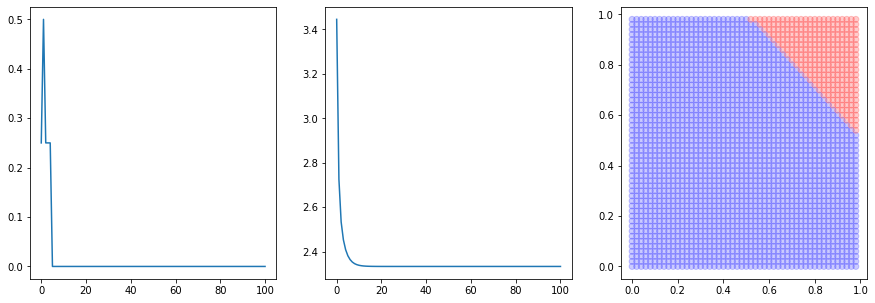

In [34]:
### 바이어스 없는경우 
## 결과를 보면 정확도(인식률) 1이 나오지 않고, cost도 어느 정도에서 멈춤 => 즉 바이어스 미사용시 학습횟수
#와 상관없이 학습이 되지않음
### nand조건으로 연습해보자
learning_rate = 0.1
x_data = [[0, 0],       [0, 1],        [1, 0],        [1, 1]]
y_data = [[1],  [1],      [1],   [0]]  

x_data = np.array(x_data, dtype=np.float32)
y_data = np.array(y_data, dtype=np.float32)

x = tf.placeholder(tf.float32, [None, 2])
y = tf.placeholder(tf.float32, [None, 1])


w = tf.Variable(tf.random_normal([2, 1]))
b = tf.Variable(tf.random_normal([1]))

# 바이어스 제거 : 즉 +b가 사라짐
hypothesis = tf.matmul(x, w)

cost = tf.reduce_sum(tf.square(hypothesis - y))

train = tf.train.GradientDescentOptimizer(learning_rate=learning_rate).minimize(cost)

predicted = tf.cast(hypothesis > 0.5, dtype=tf.float32)
accuracy = tf.reduce_mean(tf.cast(tf.equal(predicted, y), dtype=tf.float32))

sess.run(tf.global_variables_initializer())

result = []
result_cost = []

## 학습중단조건 없이 학습시킴
old = 100
for step in range(101):
        sess.run(train, feed_dict={x: x_data, y: y_data})
        a, c =  sess.run([accuracy, cost], feed_dict={x: x_data, y: y_data})
        result_cost.append(c)
        result.append(a)
        if step % 10 == 0 : 
            print( step+ 1, c  )                
        old = c
        
plt.figure(1, figsize=(15,5))        

plt.subplot(1,3,1)
plt.plot(result)
plt.subplot(1,3,2)
plt.plot(result_cost)

plt.subplot(1,3,3)
xx, yy = np.mgrid[0:1:0.02, 0:1:0.02]
grid = np.c_[xx.flatten(), yy.flatten()]
h = sess.run(hypothesis, feed_dict={x: grid})
colors = ["red"  if i>  0.5  else  "blue"  for i  in h   ]
plt.scatter(xx.flatten(), yy.flatten(), color = colors, alpha=0.2) 
## 정확도(인식률) 1이 나오지 않고, cost도 어느 정도에서 멈춤 => 즉 바이어스 미사용시 학습횟수
#와 상관없이 학습이 되지않음

In [36]:
#바이어스 있는경우
# 바이어스 주는 방법1 : 바이어스를 직접 정의해서 hypothesis 에서 더해주기 : +b
# 바이어스 주는 방법2: x_data에 차원을 1씩 더해주기.. 즉 4*2라면 4*3으로 만들기
learning_rate = 0.1
x_data = [[0, 0, 1],       [0, 1, 1],        [1, 0, 1],        [1, 1, 1]] ##4*3
y_data = [[1],  [1],      [1],   [0]]   

x_data = np.array(x_data, dtype=np.float32)
y_data = np.array(y_data, dtype=np.float32)

x = tf.placeholder(tf.float32, [None, 3]) ##x_data가 바뀌었기 때문에 none*3
y = tf.placeholder(tf.float32, [None, 1])


w = tf.Variable(tf.random_normal([3, 1])) ## x_data가 바뀌어서 3*1

hypothesis = tf.matmul(x, w)

cost = tf.reduce_sum(tf.square(hypothesis - y))

train = tf.train.GradientDescentOptimizer(learning_rate=learning_rate).minimize(cost)

predicted = tf.cast(hypothesis > 0.5, dtype=tf.float32)
accuracy = tf.reduce_mean(tf.cast(tf.equal(predicted, y), dtype=tf.float32))

sess.run(tf.global_variables_initializer())

old = 100  ## 학습을 100번시키고, break조건은 cost함수가 이전보다 변화값이 0.0000001보다 작은경어
for step in range(101):
        sess.run(train, feed_dict={x: x_data, y: y_data})
        a, c =  sess.run([accuracy, cost], feed_dict={x: x_data, y: y_data})
        if (old - c  <= 0.0000001 ) :     
            break
        if step % 10 == 0 : 
            print( step+ 1, c)                
        old = c      
print("인식률 ", a)
### 학습율이 잘되었군

1 2.586371
11 0.30918264
21 0.2529139
31 0.25018615
41 0.2500126
51 0.25000083
인식률  1.0


## 평균이 다른 두개의 정규분포 분류하기(선형)

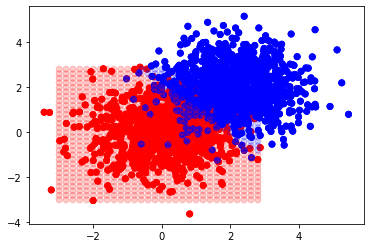

In [39]:
samples = 1000
x_data1 = np.random.normal(0, 1, size=[samples,2]) # 평균0,편차1 1000*2
x_data2 = np.random.normal(2, 1, size=[samples,2]) # 평균2,편차1 1000*2
## data1,data2를 위아래로(vstack)연결해서 x_data만듬. 즉 2000*2
x_data = np.vstack([x_data1, x_data2])

## 이때 np.zeros는 0으로 이루어진 (1000,1) / np.ones는 1로 이루어진 (1000,1)
## 이 두개를 가로로 연결해서 (hstack) 1*2000으로 만들어서
## 다시 reshape 2000*1로만들기
y_data = np.hstack([np.zeros(samples), np.ones(samples)]).reshape(samples*2,1)   

## y값이 0이면 빨강, 1이면 블루
colors = ["red"  if i == 0  else  "blue"  for i  in y_data   ]
## scatter함수로 출력
plt.scatter(x_data[:,0], x_data[:,1], color=colors)

learning_rate = 0.1

x = tf.placeholder(tf.float32, [None, 2])## x_data가 2개의 클래스가지니까 none*2
y = tf.placeholder(tf.float32, [None, 1])


w = tf.Variable(tf.random_normal([2, 1]))## x_data가 2개의 클래스니까 2*1
b = tf.Variable(tf.random_normal([1]))

hypothesis = tf.sigmoid(tf.matmul(x, w) + b)

### 이건 두개의 그룹에 대한 분석이니까 Losistice에서 사용한 log함수로 cost정의
cost = -tf.reduce_mean(y * tf.log(hypothesis) + (1 - y) * tf.log(1 - hypothesis))  

train = tf.train.GradientDescentOptimizer(learning_rate=learning_rate).minimize(cost)

predicted = tf.cast(hypothesis > 0.5, dtype=tf.float32)
accuracy = tf.reduce_mean(tf.cast(tf.equal(predicted, y), dtype=tf.float32))

sess.run(tf.global_variables_initializer())

for step in range(1000):  ### 학습을 1000 하고
        sess.run(train, feed_dict={x: x_data, y: y_data})
        
colors = ["red"  if i == 0  else  "blue"  for i  in y_data   ]
plt.scatter(x_data[:,0], x_data[:,1], color=colors)


xx, yy = np.mgrid[-3:3:0.2, -3:3:0.2]
grid = np.c_[xx.flatten(), yy.flatten()]
p = sess.run(hypothesis, feed_dict={x: grid})
## p가 0.5보다 작으면 red, 크면 blue
colors = ["red"  if i <  0.5  else  "blue"  for i  in p   ]
plt.scatter(xx.flatten(), yy.flatten(), color = colors, alpha=0.2)     

학습데이터와 학습경계면이 잘 구분되는군

## xor분석(하나의선형으로 분리불가) :xor은 두개의 그룹으로 분류되어있는데 학습된 결정경계면은 한줄뿐...이게 두줄이 되어야함

In [40]:
learning_rate = 0.1
## 입력값이 같으면 0, 다르면 1
x_data = [[0, 0],       [0, 1],        [1, 0],        [1, 1]]  ##4*2
y_data = [[0],  [1],      [1],   [0]]

x_data = np.array(x_data, dtype=np.float32)
y_data = np.array(y_data, dtype=np.float32)

x = tf.placeholder(tf.float32, [None, 2]) ## none*2
y = tf.placeholder(tf.float32, [None, 1])


w = tf.Variable(tf.random_normal([2, 1])) ## 2*1
b = tf.Variable(tf.random_normal([1]))

# 바이어스
hypothesis = tf.sigmoid(tf.matmul(x, w) + b)
## 선형이 아니기 때문에 log
cost = -tf.reduce_mean(y * tf.log(hypothesis) + (1 - y) * tf.log(1 - hypothesis)) 

train = tf.train.GradientDescentOptimizer(learning_rate=learning_rate).minimize(cost)

predicted = tf.cast(hypothesis > 0.5, dtype=tf.float32)
accuracy = tf.reduce_mean(tf.cast(tf.equal(predicted, y), dtype=tf.float32))

sess.run(tf.global_variables_initializer())

result = []
result_cost = []

for step in range(1001):  ## break없이 1000번훈련
        sess.run(train, feed_dict={x: x_data, y: y_data})
        p, a, c =  sess.run([predicted, accuracy, cost], feed_dict={x: x_data, y: y_data})
        result.append(a)        
        result_cost.append(c)        
        if step % 100 == 0 :
            print(step+1, p.reshape(1,4), a, c)
print("학습완료")     

## 학습횟수 / 예측값 / 정확도 / cost 
##1001번을 학습해도 정확도가 0.75에 불과,  정답은 0110인데 1110으로나옴

1 [[1. 1. 1. 0.]] 0.75 0.725883
101 [[1. 0. 1. 0.]] 0.5 0.7068105
201 [[1. 0. 1. 0.]] 0.5 0.69926465
301 [[1. 0. 1. 0.]] 0.5 0.6958973
401 [[1. 1. 1. 0.]] 0.75 0.69438815
501 [[1. 1. 1. 0.]] 0.75 0.69370884
601 [[1. 1. 1. 0.]] 0.75 0.693402
701 [[1. 1. 1. 0.]] 0.75 0.69326293
801 [[1. 1. 1. 0.]] 0.75 0.69319975
901 [[1. 1. 1. 0.]] 0.75 0.69317114
1001 [[1. 1. 1. 0.]] 0.75 0.69315803
학습완료


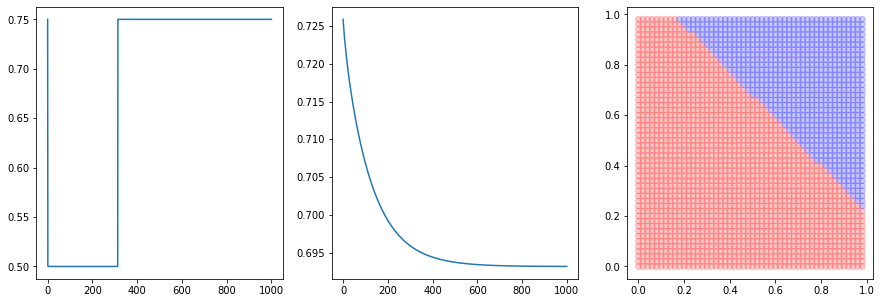

In [41]:
plt.figure(1, figsize=(15,5))

plt.subplot(1,3,1) ## 정확도
plt.plot(result)

plt.subplot(1,3,2) ## 코스트값
plt.plot(result_cost)

plt.subplot(1,3,3)  ## 학습결과를 시각화한 결정 경계면              
xx, yy = np.mgrid[0:1:0.02, 0:1:0.02]
grid = np.c_[xx.flatten(), yy.flatten()]
p = sess.run(hypothesis, feed_dict={x: grid})
colors = ["red"  if i>  0.5  else  "blue"  for i  in p   ]
plt.scatter(xx.flatten(), yy.flatten(), color = colors, alpha=0.2)  

xor은 두개의 그룹으로 분류되어있는데 학습된 결정경계면은 한줄뿐...이게 두줄이 되어야함

## 도넛모양의 비선형 분포 분류

1 0.69337654 0.474
101 0.61794287 0.692
201 0.61683095 0.692
301 0.61681324 0.692
401 0.61681294 0.692
501 0.6168129 0.692
601 0.6168129 0.692
701 0.6168129 0.692
801 0.61681294 0.692
901 0.61681294 0.692
1001 0.61681294 0.692
학습완료


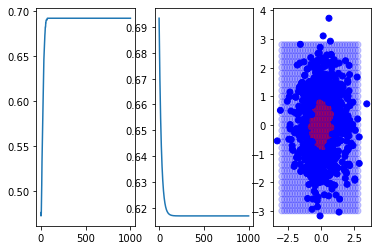

In [43]:
samples = 1000
x_data = np.random.normal(0, 1, size=[samples,2])  ##1000*2
## 중심에서 거리계산
##거리에 따라 학습데이터를 2개로분리
d = np.sqrt([x[0]**2+x[1]**2  for x in x_data ])
## 중심에서 거리가 0.8이하면 0, 이상이면 1
y_data = np.array([0  if   i < 0.8   else   1 for i  in d   ]).reshape(samples, 1)

colors = ["red"  if   i  == 0  else   "blue"  for i  in y_data   ]
plt.scatter(x_data[:,0], x_data[:,1], color=colors)

x = tf.placeholder(tf.float32, [None, 2]) ## none*2
y = tf.placeholder(tf.float32, [None, 1])

w = tf.Variable(tf.random_normal([2, 1]))  ## 2* 1
b = tf.Variable(tf.random_normal([1]))


hypothesis = tf.sigmoid(tf.matmul(x, w) + b)

cost = -tf.reduce_mean(y * tf.log(hypothesis) + (1 - y) * tf.log(1 - hypothesis)) 

train = tf.train.GradientDescentOptimizer(learning_rate=learning_rate).minimize(cost)

predicted = tf.cast(hypothesis > 0.5, dtype=tf.float32)
accuracy = tf.reduce_mean(tf.cast(tf.equal(predicted, y), dtype=tf.float32))

sess.run(tf.global_variables_initializer())

result = []
result_cost = []


for step in range(1001):
        sess.run(train, feed_dict={x: x_data, y: y_data})
        a, c =  sess.run([accuracy, cost], feed_dict={x: x_data, y: y_data})
        result.append(a)        
        result_cost.append(c)        
        if step % 100 == 0 :
            print(step+1,c, a)
## 학습횟수, cost, 정확도 출력
## 결과를 보면 cost가 변화가 줄어들고(더이상변하지않고) 정확도도 0.692에서 더이상 바뀌지않음
print("학습완료")   

plt.figure(1, figsize=(15,5))

plt.subplot(1,3,1)
plt.plot(result)
plt.subplot(1,3,2)
plt.plot(result_cost)
plt.subplot(1,3,3)


colors = ["red"  if   i  == 0  else   "blue"  for i  in y_data   ]
plt.scatter(x_data[:,0], x_data[:,1], color=colors)

xx, yy = np.mgrid[-3:3:0.2, -3:3:0.2]
grid = np.c_[xx.ravel(), yy.ravel()]
p = sess.run(hypothesis, feed_dict={x: grid})
colors = ["red"  if i <  0.5  else  "blue"  for i  in p   ]
plt.scatter(np.array([xx]).flatten(), np.array([yy]).flatten(), color = colors, alpha=0.2)   
##정확도 코스트값 결정경계면 그래프를 그림
## 정확도가 0.7에서 더이상 향상안됨
## 코스트도 0.6이후로 더이상 작아지지않음
## 두그룹은 모두 파란색으로 분류됨...즉 하나의 선으로 구분할수 없는 비선형이라서 모두 파란색으로 나옴
### 파란색의 학습데이터수가 빨간색보다 많아서 파란색으로 표기: 즉 오차를 최소화하기위해 파란색으로 분류하도록지정
## 즉 단층 퍼셉트론의 한계가 있음